# Cohort Analysis
-By Ankit Kumar

Data used in this project is of “Online Retail Data Set” from the UCI Machine Learning Repository. This is a transaction data set containing all the transaction between 12/01/2010 and 12/09/2011 for UK-based online retail. The number of instances is around 5 lacs. It is a relatively clean data set for exploring the usability and testing for customer behavior, especially for cohort analysis.

Cohort Analysis is a powerful tool for tracking user behaviors on the product. It is highly flexible. The time period can be changed from month to week even day-basis. Multiple metrics can be used in the diverse behavioral measurement.

**Project Workflow :**

- Dataset exploration and cleaning
- Create a cohort
- Visualize the cohort analysis

In [2]:
#Importing necessary libraries and packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#loading the dataset
df=pd.read_excel('Online Retail.xlsx')

### Dataset exploration and cleaning

In [15]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> It can be seen that there are missing values in the CustomerID column. As CustomerID cannoot be imputed in any way, its better to drop those missing values

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
#dropping the NA values in CustomerID
df2=df.dropna(subset=['CustomerID'])

In [21]:
#checking if the removal was successful
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [22]:
#checking for the missing values again
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
#random entries from the dataset
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
281726,561599,23284,DOORMAT KEEP CALM AND COME IN,6,2011-07-28 11:29:00,7.95,12853.0,United Kingdom
105935,545301,20677,PINK POLKADOT BOWL,8,2011-03-01 12:26:00,1.25,12679.0,France
510699,579465,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,2011-11-29 14:53:00,0.79,15790.0,United Kingdom
81431,543128,22219,LOVEBIRD HANGING DECORATION WHITE,12,2011-02-03 14:54:00,0.85,12971.0,United Kingdom
517420,580054,22189,CREAM HEART CARD HOLDER,2,2011-12-01 13:08:00,3.95,18122.0,United Kingdom
522746,580441,22255,FELT TOADSTOOL SMALL,12,2011-12-04 12:18:00,0.85,13808.0,United Kingdom
14006,537441,22212,FOUR HOOK WHITE LOVEBIRDS,4,2010-12-06 17:26:00,2.10,13564.0,United Kingdom
238882,557958,47599B,BLUE PARTY BAGS,3,2011-06-23 19:27:00,2.10,16161.0,United Kingdom
4225,536754,20981,12 PENCILS TALL TUBE WOODLAND,3,2010-12-02 14:09:00,0.85,14449.0,United Kingdom
31017,538888,16012,FOOD/DRINK SPONGE STICKERS,48,2010-12-14 16:23:00,0.21,17912.0,United Kingdom


> The data is now free from missing values issue

### Creating cohort

For creating cohort we need the InvoiceMonth and the CohortMonth.

**Invoice Month**

In [25]:
#creating function to extract InvoiceMonth from InvoiceDate
def func1(x):
     return dt.datetime(x.year, x.month, 1)

df2['InvoiceMonth']=df['InvoiceDate'].apply(func1)

F:\PYTHON\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
#checking if InvoiceMonth was successful
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


**Cohort Month**

In [61]:
df2['Cmonth']=df2.groupby('CustomerID')['InvoiceMonth'].transform('min')

F:\PYTHON\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df2.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cmonth
55251,540981,21314,SMALL GLASS HEART TRINKET POT,8,2011-01-12 15:25:00,2.10,12868.0,United Kingdom,2011-01-01,2010-12-01
463952,576076,23154,SET OF 4 JAM JAR MAGNETS,1,2011-11-13 16:18:00,2.08,14382.0,United Kingdom,2011-11-01,2011-11-01
146398,548987,22794,SWEETHEART WIRE MAGAZINE RACK,1,2011-04-05 12:50:00,7.95,14535.0,United Kingdom,2011-04-01,2011-04-01
175440,551958,22679,FRENCH BLUE METAL DOOR SIGN 4,10,2011-05-05 12:37:00,1.25,13883.0,United Kingdom,2011-05-01,2011-01-01
388655,570448,20726,LUNCH BAG WOODLAND,10,2011-10-10 14:55:00,1.65,13224.0,United Kingdom,2011-10-01,2011-07-01
218525,556051,22839,3 TIER CAKE TIN GREEN AND CREAM,1,2011-06-08 13:09:00,14.95,13742.0,United Kingdom,2011-06-01,2011-01-01
172682,551550,22423,REGENCY CAKESTAND 3 TIER,1,2011-05-03 09:47:00,12.75,17501.0,United Kingdom,2011-05-01,2011-05-01
224379,556517,23237,SET OF 4 KNICK KNACK TINS LEAVES,6,2011-06-13 10:52:00,4.15,12481.0,Germany,2011-06-01,2010-12-01
22521,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2010-12-01
404930,571701,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-10-18 15:05:00,2.08,14639.0,United Kingdom,2011-10-01,2010-12-01


**Cohort Index**

Difference between the InvoiceMonth and CohortMonth

In [63]:
def getyear(x):
    a=x.year
    return a
def getmonth(x):
    a=x.month
    return a

In [65]:
#Extracting the Invoice Month and Year series
iy=df2['InvoiceMonth'].apply(getyear)
im=df2['InvoiceMonth'].apply(getmonth)


In [66]:
#Extracting the Cohort Month and Year series
cy=df2['Cmonth'].apply(getyear)
cm=df2['Cmonth'].apply(getmonth)

In [72]:
#Deducing thee difference of the Invoice-Cohort Series
yeardiff=iy-cy
monthdiff=im-cm

In [74]:
#Joining the difference-series (in months)
df2['CohortIndex']=(yeardiff*12) + monthdiff +1

F:\PYTHON\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cmonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


### Creating Cohort 1: User Retention

In [77]:
#Using groupby to create the cohort table of number of active users
df3=df2.groupby(['Cmonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [91]:
df3

,Cmonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
5,2010-12-01,6,376
6,2010-12-01,7,360
7,2010-12-01,8,336
8,2010-12-01,9,336
9,2010-12-01,10,374


In [85]:
#pivoting the above table to create the Cohort
cohort_count = df3.pivot_table(index = 'Cmonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID').round(1)

In [86]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cmonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# to transform the Cohort in terms of percentage since the Cohort month
first_month=cohort_count.iloc[:,0]
Cohort=cohort_count.divide(first_month,axis=0)
Cohort=(Cohort*100).round(2)

In [88]:
Cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cmonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizing the Cohort

Text(0.5, 1, 'Cohort 1 : User Retention')

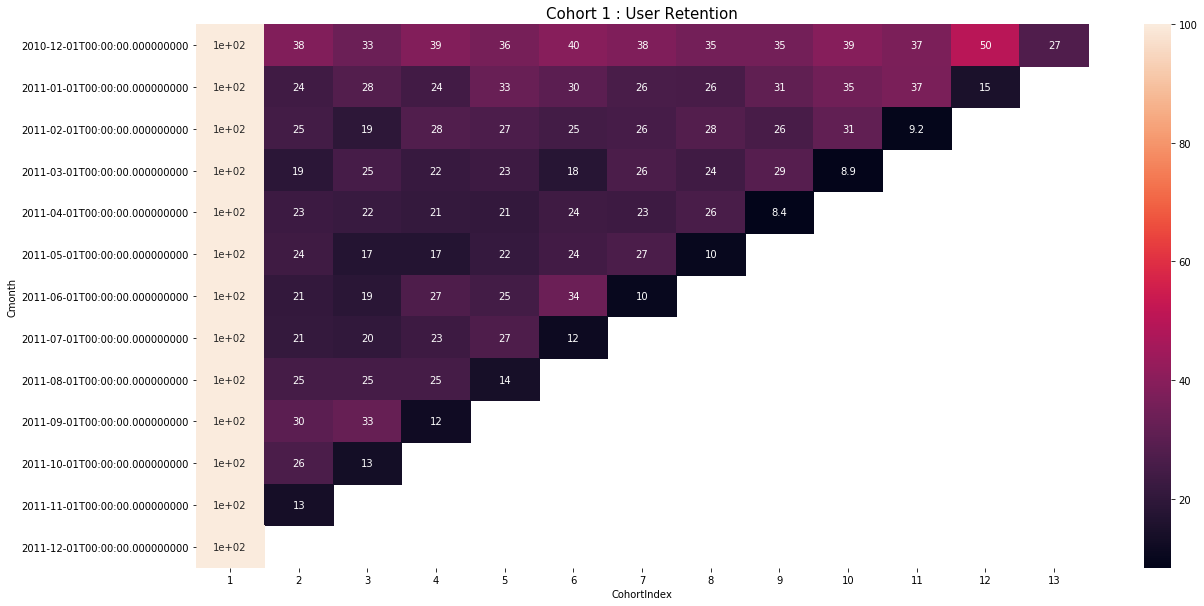

In [112]:
#Using the heatmap from seaborn to visualize the Cohort
plt.figure(figsize=(20,10))
sns.heatmap(data=Cohort,annot=True)
plt.title('Cohort 1 : User Retention',fontsize=15)

**Observation:**
>  It can be concluded that on 2011/11 some strategies might be implemented to increase the return users. About 50% of user from 2010/12 cohort return on 2011/11.

### Creating Cohort 2 : Average Quantity Sold

In [93]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cmonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1


In [100]:
#Using groupby to create the cohort table for average quantity sold
df3=df2.groupby(['Cmonth','CohortIndex'])['Quantity'].mean().reset_index()

In [101]:
df3

,Cmonth,CohortIndex,Quantity
0,2010-12-01,1,11.037691
1,2010-12-01,2,14.603253
2,2010-12-01,3,14.982141
3,2010-12-01,4,14.801090
4,2010-12-01,5,12.943024
5,2010-12-01,6,14.318095
6,2010-12-01,7,15.173387
7,2010-12-01,8,14.759559
8,2010-12-01,9,16.660455
9,2010-12-01,10,16.691004


In [104]:
#pivoting the above table to create the Cohort
Cohort2=df3.pivot_table(index='Cmonth',columns='CohortIndex',values='Quantity').round(1)

In [105]:
Cohort2

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cmonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Cohort 2 : Average Quantity Sold')

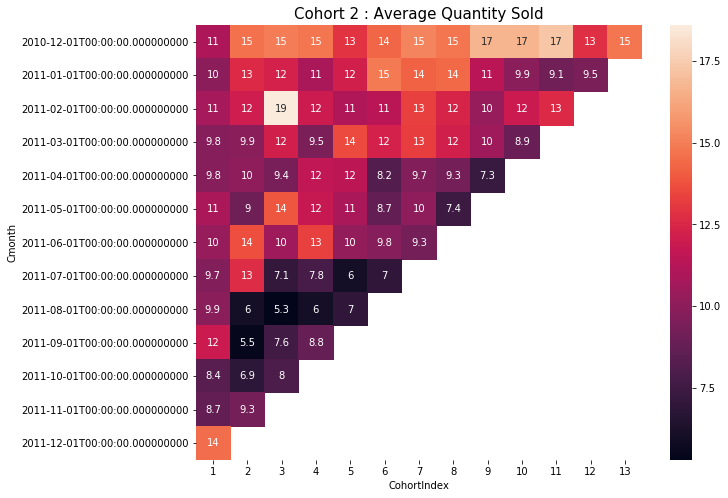

In [113]:
#Using the heatmap from seaborn to visualize the Cohort
plt.figure(figsize=(10,8))
sns.heatmap(Cohort2,annot=True)
plt.title('Cohort 2 : Average Quantity Sold',fontsize=15)

**Observation:**
>It can be seen that in the recent months, the average quantity on the the platform is facing a decline.

### Creating Cohort 3 : Average Sales

In [116]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cmonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1


In [118]:
#Calculating total sales :
df2['Total_Sales']=df2['UnitPrice']*df2['Quantity']

F:\PYTHON\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
#Checking the head of the dataframe
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cmonth,CohortIndex,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [132]:
#Using groupby to create the cohort table for average quantity sold
df4=df2.groupby(['Cmonth','CohortIndex'])['Total_Sales'].mean().reset_index()

In [133]:
df4

,Cmonth,CohortIndex,Total_Sales
0,2010-12-01,1,20.655643
1,2010-12-01,2,24.962459
2,2010-12-01,3,25.139521
3,2010-12-01,4,24.978069
4,2010-12-01,5,19.909629
5,2010-12-01,6,25.480250
6,2010-12-01,7,26.451463
7,2010-12-01,8,25.372125
8,2010-12-01,9,25.980501
9,2010-12-01,10,31.138593


In [138]:
#pivoting the above table to create the Cohort
Cohort3=df4.pivot_table(index='Cmonth',columns='CohortIndex',values='Total_Sales').round(1)

In [139]:
Cohort3

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cmonth,,,,,,,,,,,,,
2010-12-01,20.7,25.0,25.1,25.0,19.9,25.5,26.5,25.4,26.0,31.1,30.6,22.2,24.7
2011-01-01,18.4,23.5,20.3,17.5,21.5,25.4,24.4,24.5,18.7,20.1,18.7,18.4,NaN
2011-02-01,17.0,17.0,19.3,18.8,16.1,15.1,21.6,20.9,17.5,20.6,21.5,NaN,NaN
2011-03-01,17.0,17.9,21.5,17.0,19.2,18.1,21.7,17.3,15.4,11.4,NaN,NaN,NaN
2011-04-01,16.4,20.2,18.8,18.4,18.6,14.2,14.6,15.3,11.8,NaN,NaN,NaN,NaN
2011-05-01,19.0,15.7,21.2,19.4,17.8,14.1,16.1,13.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.4,14.5,19.0,19.8,15.0,15.9,12.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.1,21.2,11.4,12.4,10.5,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.1,11.9,11.5,14.4,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Cohort 3 : Average Sales')

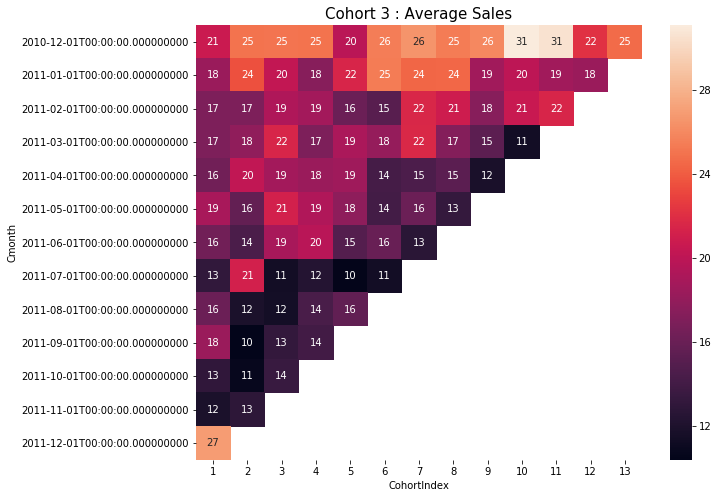

In [140]:
#Using the heatmap from seaborn to visualize the Cohort
plt.figure(figsize=(10,8))
sns.heatmap(Cohort3,annot=True)
plt.title('Cohort 3 : Average Sales',fontsize=15)

**Observation:**
>It can be seen that average sales in the recent month is declining which is accordance to Cohort2: Average quantities.